In [1]:
# NOTE: Although this exercise seeks to replicate the ML process 'in real life', in some places this is not possible
# for example, where 'realistic' estimator fits/grid searches might take a significant amount of time

In [2]:
import  pandas as pd

# read in the file - which in this case is in csv - comma separated value - format
# we use:
#   sep = ',' to set the separator (noting that comma is actually the default so this is not necessary to include)
#   header = None as the dataset does not have a header row
#   na_values = '?' as this dataset uses the ? to represent missing values
# NOTES:
#   - if a separator other than ',' was used we would use the 'sep=' parameter
#   - if the data were in Excel format we can use pd.read_excel - and there are a number of other methods for different datatypes
# df = pd.read_csv('./communities.data', sep=',', header=None, na_values='?', keep_default_na=True)
# df


# df = pd.read_csv(filepath_or_buffer='C:/Users/annaz/Dropbox/Teaching/Teaching Machine Learning/Python_teaching/communities.data', sep=',', header=None, na_values='?', keep_default_na=True)
# df
# To access files in your Google Drive from Google Colaboratory, you need to authenticate your notebook with Google Drive. Run the following code to authenticate:
from google.colab import drive
drive.mount('/content/drive')

import os

# Set the search parameters
filename = 'communities.data'
search_path = '/content/drive/My Drive/Colab Notebooks/'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/communities.data', sep=',', header=None, na_values='?', keep_default_na=True) #read the bank dataset from the google drive directory 
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [3]:
# sanity check - we should have 1994 rows and 128 columns
print(f'There are {len(df)} rows')
print(f'and {len(df.columns)} columns')

There are 1994 rows
and 128 columns


In [4]:
# The data file didn't include a header row, so we'll set the column names now
# NOTE: We could also have done this as part of the read_csv call
column_names = ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']
df.columns = column_names
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [5]:
# Now we'll take a quick look at the variables
# we'll use include='all' to show all columns, not just numeric ones
df.describe(include='all')

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,820.000000,817.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,319.000000,1994.000000
unique,NaN,NaN,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Greenvillecity,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,58.826829,46188.336597,NaN,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,...,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078,0.237979
std,16.397553,126.420560,25299.726569,NaN,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,...,0.109459,0.203092,0.229055,0.214778,0.140207,0.213944,0.405808,0.240328,0.164718,0.232985
min,1.000000,1.000000,70.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,9.000000,25065.000000,NaN,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.000000,0.110000,0.070000
50%,34.000000,23.000000,48090.000000,NaN,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,...,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.500000,0.000000,0.150000,0.150000
75%,42.000000,59.500000,66660.000000,NaN,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,...,0.070000,0.280000,0.190000,0.195000,0.060000,0.840000,1.000000,0.000000,0.220000,0.330000


In [6]:
# Depending on your notebook settings this might not show all columns - if it isn't, we can change this
pd.options.display.max_columns = None
df.describe(include='all')

# NOTE: There are a number of variables/columns with incomplete data (count < 1994)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,820.000000,817.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1993.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,319.000000,1994.000000
unique,NaN,NaN,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Greenvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [7]:
# Let's look at our dependent variable - ViolentCrimesPerPop
df['ViolentCrimesPerPop'].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

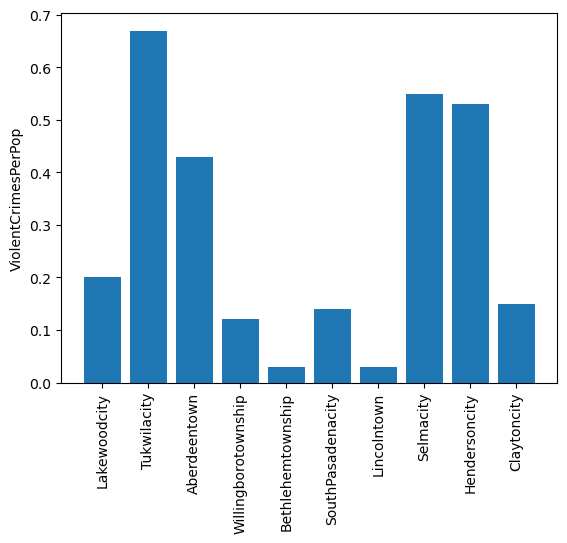

In [8]:
# Let's show a histogram of ViolentCrimesPerPop for the first 10 communities
import matplotlib.pyplot as plt

plt.bar(x=range(len(df[:10])), height=df['ViolentCrimesPerPop'][:10], tick_label=df['communityname'][:10])
plt.ylabel('ViolentCrimesPerPop')
plt.xticks(rotation=90)
plt.show()

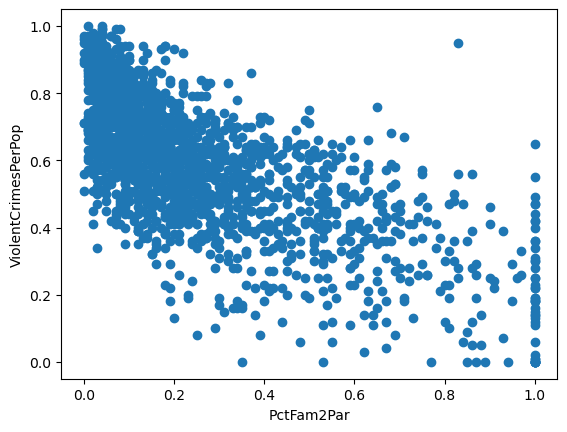

In [9]:
# Plot ViolentCrimesPerPop vs PctFam2Par
plt.scatter(x=df['ViolentCrimesPerPop'], y=df['PctFam2Par'])
plt.ylabel('ViolentCrimesPerPop')
plt.xlabel('PctFam2Par')
plt.show()

In [10]:
# Now do an OLS
# Our dependent variable is: ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)

# Our independent variables are:
#   PolicBudgPerPop: police operating budget per population (numeric - decimal)
#   NumStreet: number of homeless people counted in the street (numeric - decimal)
#   PctNotSpeakEnglWell: percent of people who do not speak English well (numeric - decimal)
#   PctFam2Par: percentage of families (with kids) that are headed by two parents (numeric - decimal)
#   PctPopUnderPov: percentage of people under the poverty level (numeric - decimal)
#   perCapInc: per capita income (numeric - decimal)
#   agePct12t21: percentage of population that is 12-21 in age (numeric - decimal)
#   agePct12t29: percentage of population that is 12-29 in age (numeric - decimal)
#   agePct16t24: percentage of population that is 16-24 in age (numeric - decimal)
#   agePct65up: percentage of population that is 65 and over in age (numeric - decimal)
#   LemasTotReqPerPop: total requests for police per 100K popuation (numeric - decimal)

y_ols = df['ViolentCrimesPerPop'].copy()
X_ols = df[['PolicBudgPerPop', 'NumStreet', 'PctNotSpeakEnglWell', 'PctFam2Par', 'PctPopUnderPov', 'perCapInc', 'agePct12t21',
        'agePct12t29', 'agePct16t24', 'agePct65up', 'LemasTotReqPerPop']].copy()

In [11]:
X_ols.describe()

,PolicBudgPerPop,NumStreet,PctNotSpeakEnglWell,PctFam2Par,PctPopUnderPov,perCapInc,agePct12t21,agePct12t29,agePct16t24,agePct65up,LemasTotReqPerPop
count,319.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,319.000000
mean,0.195078,0.022778,0.150587,0.610918,0.303024,0.350251,0.424218,0.493867,0.336264,0.423164,0.215204
std,0.164718,0.100400,0.219716,0.201976,0.228474,0.191109,0.155196,0.143564,0.166505,0.179185,0.164622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.110000,0.000000,0.030000,0.490000,0.110000,0.220000,0.340000,0.410000,0.250000,0.300000,0.120000
50%,0.150000,0.000000,0.060000,0.630000,0.250000,0.300000,0.400000,0.480000,0.290000,0.420000,0.170000
75%,0.220000,0.000000,0.160000,0.760000,0.450000,0.430000,0.470000,0.540000,0.360000,0.530000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Ordinary Least Square - all variables using sklearn
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X=X_ols, y=y_ols)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [40]:
# Oops! We should have noticed that PolicBudgPerPop and LemasTotReqPerPop are only valid for a subset of the data!
# Only 319 rows have valid values for these - 


# one thing we can do with missing is to drop all missing

# drop na rows from the variables we're actually using

# drop missing data if necessary i.e. 
X_ols_dropmiss = X_ols.dropna().copy()
y_ols_dropmiss = y_ols[X_ols_dropmiss.index].copy()


In [41]:
#run the OLS on the rows where there is no-missing

ols = LinearRegression()
ols.fit(X=X_ols_dropmiss, y=y_ols_dropmiss)
# and check the goodness of the fit
print('R-squared for OLS fit:')
ols.score(X=X_ols_dropmiss, y=y_ols_dropmiss)

R-squared for OLS fit:


0.6355509740871219

In [42]:
# Show the feature importance (absolute coefficient values) for each independent variable
# print out the results from the ols regression above 

coef_df_dropmiss = pd.DataFrame(data=[ols.coef_], columns=X_ols_dropmiss.columns, index=['OLS'])
coef_df_dropmiss


,PolicBudgPerPop,NumStreet,PctNotSpeakEnglWell,PctFam2Par,PctPopUnderPov,perCapInc,agePct12t21,agePct12t29,agePct16t24,agePct65up,LemasTotReqPerPop
OLS,-0.060796,0.28133,0.071778,-0.929628,0.076152,0.075782,0.438607,-0.212609,-0.309342,-0.202547,0.136816


In [43]:
#but then you're only left with 319 observations where there's full info in every row!
#why waste data like that?
X_ols_dropmiss.describe()

,PolicBudgPerPop,NumStreet,PctNotSpeakEnglWell,PctFam2Par,PctPopUnderPov,perCapInc,agePct12t21,agePct12t29,agePct16t24,agePct65up,LemasTotReqPerPop
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.195078,0.106489,0.245956,0.462226,0.395235,0.334295,0.420533,0.532821,0.366113,0.414734,0.215204
std,0.164718,0.211153,0.269696,0.201231,0.199120,0.167174,0.122616,0.117848,0.131137,0.152828,0.164622
min,0.000000,0.000000,0.020000,0.000000,0.040000,0.040000,0.060000,0.040000,0.030000,0.060000,0.000000
25%,0.110000,0.000000,0.055000,0.340000,0.230000,0.230000,0.350000,0.470000,0.290000,0.310000,0.120000
50%,0.150000,0.020000,0.130000,0.480000,0.400000,0.290000,0.410000,0.520000,0.330000,0.410000,0.170000
75%,0.220000,0.090000,0.335000,0.610000,0.515000,0.380000,0.470000,0.575000,0.400000,0.490000,0.250000
max,1.000000,1.000000,1.000000,0.920000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Impute median values of missing X variables
# We use a pipeline because, later, when we do ML you need to partition 
# your data and you may only want to do things in one partition of the data 
# and not the other

# Let's create a ML pipeline where we fill these with median values
# NOTE: We'll also add a data standardization step to the pipeline
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('standardise', StandardScaler()),
    ('estimator', LinearRegression())
])

In [19]:
# Now do the fit on the whole dataset, and check the R-squared
pipe.fit(X=X_ols, y=y_ols)

# and check the goodness of the fit
print('R-squared for OLS fit:')
pipe.score(X=X_ols, y=y_ols)

R-squared for OLS fit:


0.5880824764815202

In [20]:
# Show the feature importance (absolute coefficient values) for each independent variable
estimator = pipe.named_steps.estimator

coef_df = pd.DataFrame(data=[estimator.coef_], columns=pipe.named_steps.imputer.feature_names_in_, index=['OLS'])
coef_df 

,PolicBudgPerPop,NumStreet,PctNotSpeakEnglWell,PctFam2Par,PctPopUnderPov,perCapInc,agePct12t21,agePct12t29,agePct16t24,agePct65up,LemasTotReqPerPop
OLS,-0.006843,0.031105,0.039405,-0.17501,0.004555,0.015551,0.015042,-0.038332,-0.008917,-0.038745,0.015606


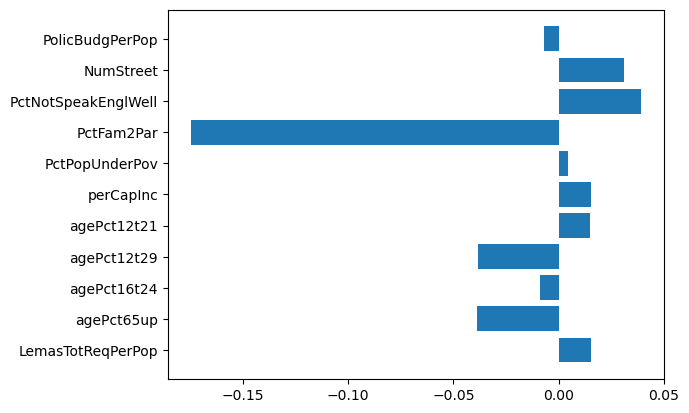

In [21]:
# And graphically
fig, ax = plt.subplots()
barh = plt.barh(y=range(len(X_ols.columns)), width=estimator.coef_)
ax.set_yticks(ticks=range(len(X_ols.columns)), labels=pipe.named_steps.imputer.feature_names_in_)
ax.invert_yaxis()
plt.show()

In [22]:
# Let's do some machine learning!
# For the machine learning models we're going to use a much bigger dataset of variables
# Note: we have created a new df for the ML runs
# Note: it's usually ok to reuse the same dfs for ols and ml, 
# but here we'll use different df names to make it clear

y_ml = df['ViolentCrimesPerPop'].copy()
X_ml = df.drop(
    columns=['state', 'county', 'community', 'communityname', 'fold', 'ViolentCrimesPerPop']
)



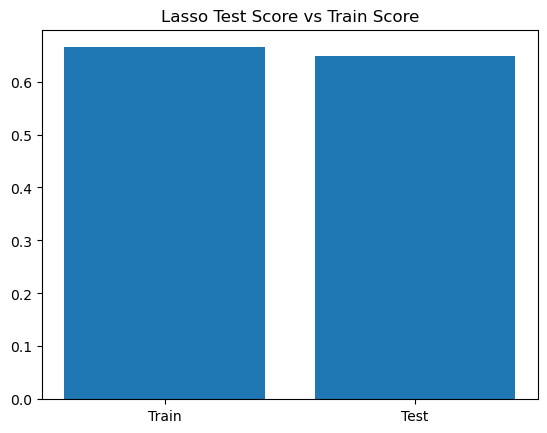

In [23]:
# For all the ML models, we're going to use GridSearchCV to optimise the hyperparameters
# Problem: How to ensure that the models produced in this way are generalisable/minimse overfitting?
# Answer: We'll split the whole dataset into training data and test data, run the GridSearchCV on the training data, 
# then look at the test vs train score
# If we're happy with this, then we can proceed to fitting the full dataset

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

grid = {
    'estimator__alpha': np.logspace(-3, 1, 100)
}

pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('standardise', StandardScaler()),
    ('estimator', Lasso())
])

X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(X_ml, y_ml, test_size=0.33, random_state=42)
grid_search_cv = GridSearchCV(estimator=pipe, param_grid=grid, cv=3)
grid_search_cv.fit(X=X_lasso_train, y=y_lasso_train)
R_squared_train = grid_search_cv.score(X=X_lasso_train, y=y_lasso_train)
R_squared_test = grid_search_cv.score(X=X_lasso_test, y=y_lasso_test)

plt.bar(x=[0,1], height=[R_squared_train, R_squared_test], tick_label=['Train', 'Test'])
plt.title('Lasso Test Score vs Train Score')
plt.show()

In [24]:
# Fit the whole dataset
# Note: this re-runs the entire pipeline on the full data set.
# The idea is that the cross-validation step shows that
# the results from the pipeline in question are generalisable, 
# after which you can repeat the pipeline on the full data set

grid_search_cv = GridSearchCV(estimator=pipe, param_grid=grid, cv=3)
_ = grid_search_cv.fit(X=X_ml, y=y_ml)

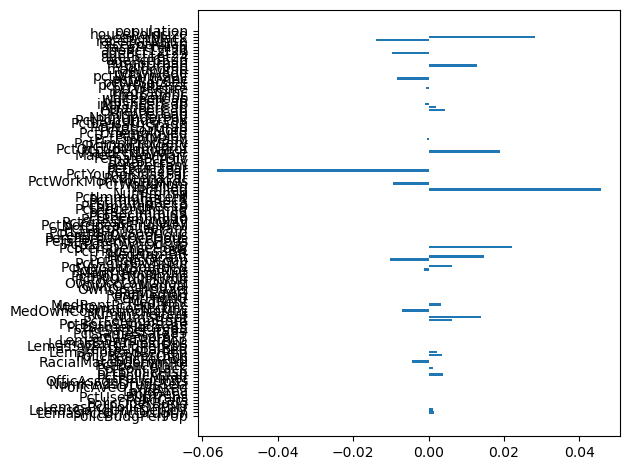

In [25]:
# And look at the coefficients chosen
fig, ax = plt.subplots()
barh = plt.barh(y=range(len(X_ml.columns)), width=grid_search_cv.best_estimator_.named_steps.estimator.coef_)
ax.set_yticks(ticks=range(len(X_ml.columns)), labels=grid_search_cv.best_estimator_.named_steps.imputer.feature_names_in_)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

,racepctblack,racePctWhite,agePct12t29,pctUrban,pctWInvInc,pctWRetire,indianPerCap,AsianPerCap,OtherPerCap,PctEmplManu,MalePctDivorce,PctKids2Par,PctWorkMom,PctIlleg,PctPersDenseHous,PctHousLess3BR,HousVacant,PctHousOccup,PctVacantBoarded,PctVacMore6Mos,MedRentPctHousInc,MedOwnCostPctIncNoMtg,NumStreet,PctForeignBorn,PctSameCity85,LemasTotReqPerPop,PolicReqPerOffic,RacialMatchCommPol,PctPolicBlack,PctPolicAsian,LemasGangUnitDeploy,LemasPctOfficDrugUn
Lasso,0.028112,-0.013967,-0.009767,0.012941,-0.008382,-0.000671,-0.000832,0.001943,0.004401,-0.000519,0.018924,-0.056042,-0.009507,0.04571,0.022247,0.000167,0.014775,-0.010241,0.006177,-0.00132,0.003349,-0.00716,0.013828,0.006227,0.000116,0.002258,0.003692,-0.004456,0.001253,0.003897,0.001102,0.001353


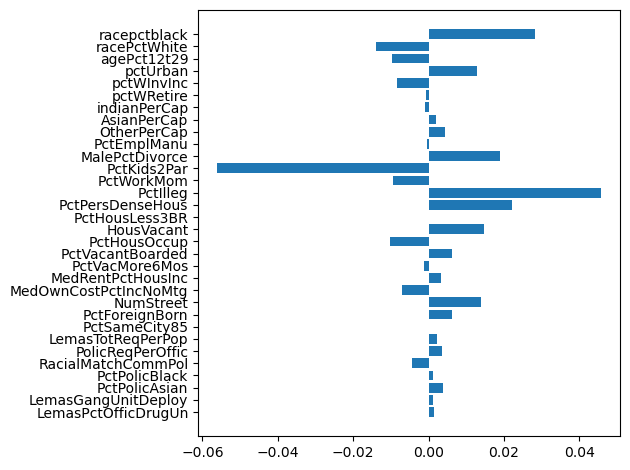

In [26]:
# That's not super-useful - let's just look at the ones that are non-zero
non_zero_coef = grid_search_cv.best_estimator_.named_steps.estimator.coef_.nonzero()

non_zero_coef_df = pd.DataFrame(data=[grid_search_cv.best_estimator_.named_steps.estimator.coef_[non_zero_coef]],
                                columns=grid_search_cv.best_estimator_.named_steps.imputer.feature_names_in_[non_zero_coef], index=['Lasso'])
display(non_zero_coef_df)

fig, ax = plt.subplots()
barh = plt.barh(y=range(len(X_ml.columns[non_zero_coef])), 
                width=grid_search_cv.best_estimator_.named_steps.estimator.coef_[non_zero_coef])
ax.set_yticks(ticks=range(len(X_ml.columns[non_zero_coef])), 
              labels=grid_search_cv.best_estimator_.named_steps.imputer.feature_names_in_[non_zero_coef])
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [27]:
coef_df = pd.concat([coef_df, 
                     pd.DataFrame(data=[grid_search_cv.best_estimator_.named_steps.estimator.coef_],
                                  columns=grid_search_cv.best_estimator_.named_steps.imputer.feature_names_in_,
                                  index=['Lasso',])]).fillna(0)

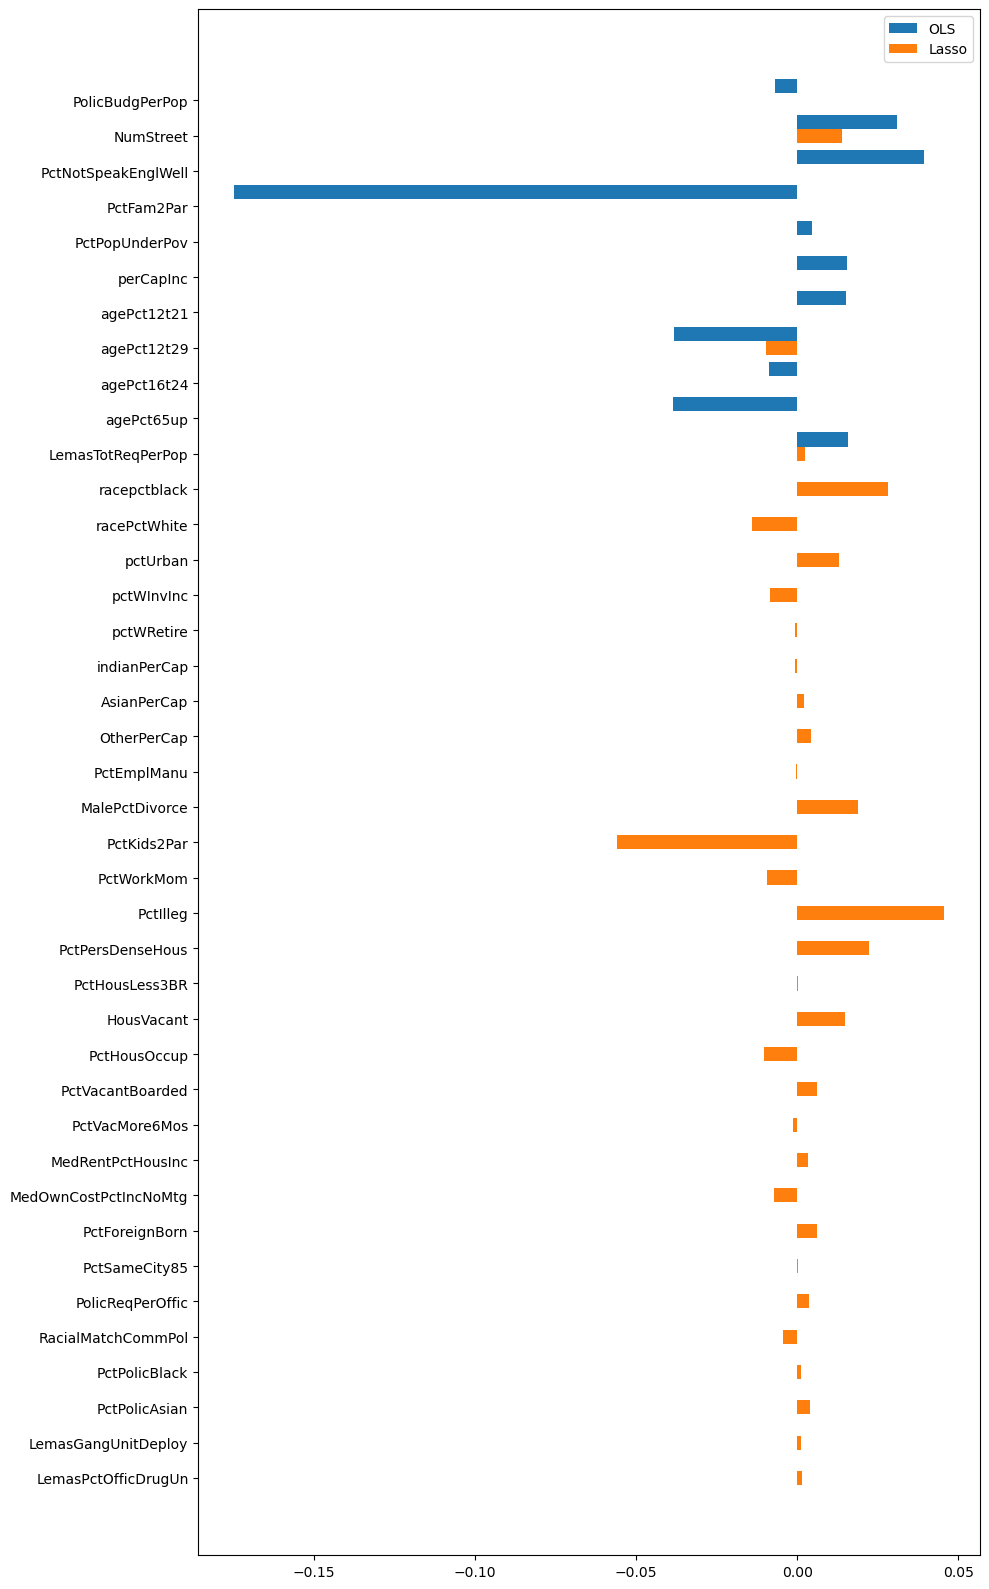

In [28]:
# Compare the coefficients produced by OLS vs Lasso
non_zero_coef = (coef_df != 0).any()
ols_lasso_coef_compare_df = coef_df[non_zero_coef[non_zero_coef].index.to_list()].copy()

ind = np.arange(len(ols_lasso_coef_compare_df.columns))
width = 0.4

fig, ax = plt.subplots()
fig.set_size_inches(10, 16)
ax.barh(ind, ols_lasso_coef_compare_df.loc['OLS'], width, label='OLS')
ax.barh(ind + width, ols_lasso_coef_compare_df.loc['Lasso'], width, label='Lasso')

ax.invert_yaxis()
ax.set_yticks(ticks=ind + width, labels=ols_lasso_coef_compare_df.columns)
ax.legend()
plt.tight_layout()
plt.show()

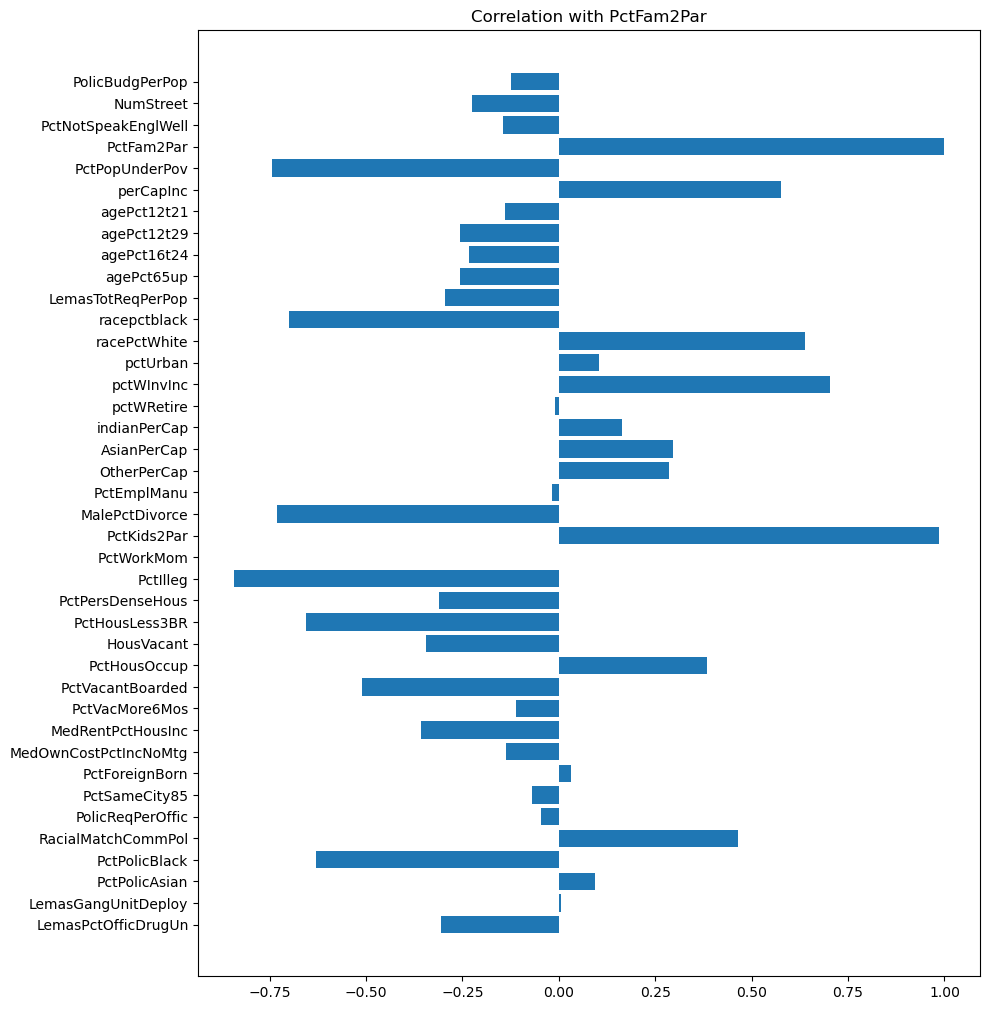

In [30]:
# the independent variable that was strongest in OLS was PctFam2Par
# It was not even picked in LASSO - why do you think that is?
# Note: LASSO picked PctKids2Par

# Let's look at the correlation between PctFam2Par and other variables picked by OLS or Lasso
pctfam2par_correlation = X_ml[ols_lasso_coef_compare_df.columns.to_list()].corr()['PctFam2Par']

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt.barh(y=range(len(pctfam2par_correlation.index)), width=pctfam2par_correlation)
ax.invert_yaxis()
ax.set_yticks(ticks=range(len(pctfam2par_correlation.index)), labels=ols_lasso_coef_compare_df.columns)
plt.tight_layout()
plt.title('Correlation with PctFam2Par')
plt.show()


In [31]:
# OK, we've compared two models: OLS and LASSO
# which one should we rely on?
# depends on your aim: causal estimation or prediction
# say we focus on prediction for now
# one way to judge how 'predictive' a model is,
# is to look at how it performs out of sample


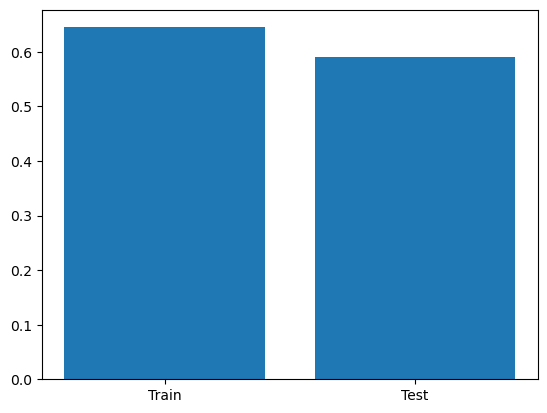

In [32]:
# Let's get an idea of how generalisable the OLS regression is
# Using train/test splitting
# Note: training OLS on 2/3 of the 'dropmiss' data then testing on 1/3 of the 'dropmiss' data


from sklearn.model_selection import train_test_split

X_ols_train, X_ols_test, y_ols_train, y_ols_test = train_test_split(X_ols_dropmiss, y_ols_dropmiss, test_size=0.33, random_state=42)
ols.fit(X=X_ols_train, y=y_ols_train)
R_squared_train = ols.score(X=X_ols_train, y=y_ols_train)
R_squared_test = ols.score(X=X_ols_test, y=y_ols_test)

plt.bar(x=[0,1], height=[R_squared_train, R_squared_test], tick_label=['Train', 'Test'])
plt.show()



In [33]:
# Now do the fit on the whole dataset, and check the R-squared
# Note: this R-sq the in-sample R-sq

ols.fit(X=X_ols_dropmiss, y=y_ols_dropmiss)


# and check the goodness of the fit
print('R-squared for OLS fit:')
ols.score(X=X_ols_dropmiss, y=y_ols_dropmiss)




R-squared for OLS fit:


0.6355509740871219

In [34]:
# For all the ML models, we're going to use GridSearchCV to optimise the hyperparameters
# Problem: How to ensure that the models produced in this way are generalisable/minimse overfitting?
# Answer: We'll use Nested CV - a more powerful version of the train/test splitting we did above, to look at the the test vs train score
# If we're happy with this, then we can proceed to fitting the full dataset

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import Lasso

grid = {
    'estimator__alpha': np.logspace(-3, 1, 100)
}

pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('standardise', StandardScaler()),
    ('estimator', Lasso())
])

cv_result = cross_validate(GridSearchCV(estimator=pipe, param_grid=grid, cv=3), X=X_ml, y=y_ml, cv=3, return_train_score=True)

# Note: by doing the gridsearchCV within the cross-validate function –  this is how we’re doing the nestedCV
# The 'cross_validate' function splits the data in test (1/3) and train (2/3), 
# then passes the training set on to GridSearchCV to do it's own hyperparmater optimisation (using CV). 
# This is repeated 3 times.



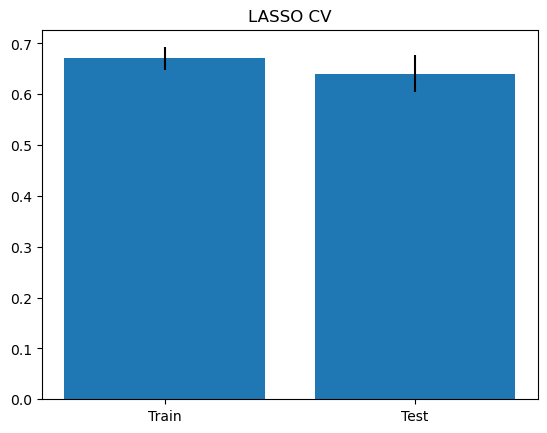

In [35]:
test_score = cv_result['test_score']
train_score = cv_result['train_score']
plt.bar(x=range(2), height = [np.mean(train_score), np.mean(test_score)], tick_label=['Train', 'Test'], 
        yerr=[np.std(train_score), np.std(test_score)])
plt.title('LASSO CV')
plt.show()

# Note: the cv_results in:
# test_score = cv_result['test_score'] is based on the 33% of full non-missing data or the outer holdout
# i.e. the R-squared using the best model from the GridSearchCV on the data initially held out (3 values)
# train_score = cv_result['train_score'] is based on the 66% of the full non-missing data
# i.e. the R-squared from the best model from the GridSearchCV but on the data used by the GridSearchCV
 


In [36]:
# Fit the whole dataset
grid_search_cv = GridSearchCV(estimator=pipe, param_grid=grid, cv=3)


# Note: in line GridSearchCV(estimator=pipe, param_grid=grid, cv=3
# the GridSearchCV only sees 2/3 of the data (each iteration), and further divides this into 1/3 and 2/3
# for hyperparameter optimisation

_ = grid_search_cv.fit(X=X_ml, y=y_ml)
# this re-runs the entire pipeline on the full data set. 
# The idea is that the cross-validation step shows that
# the results from the pipeline in question are generalisable, 
# after which you can repeat the pipeline on the full data set
# so the hyperparameters chosen in the nestedCV are likely to differ from 
# the hyperparams chosen in this pipeline

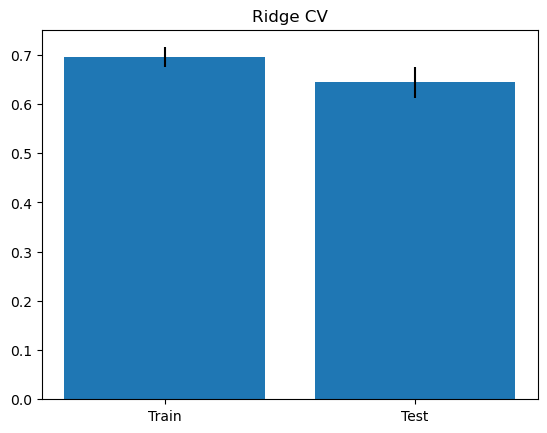

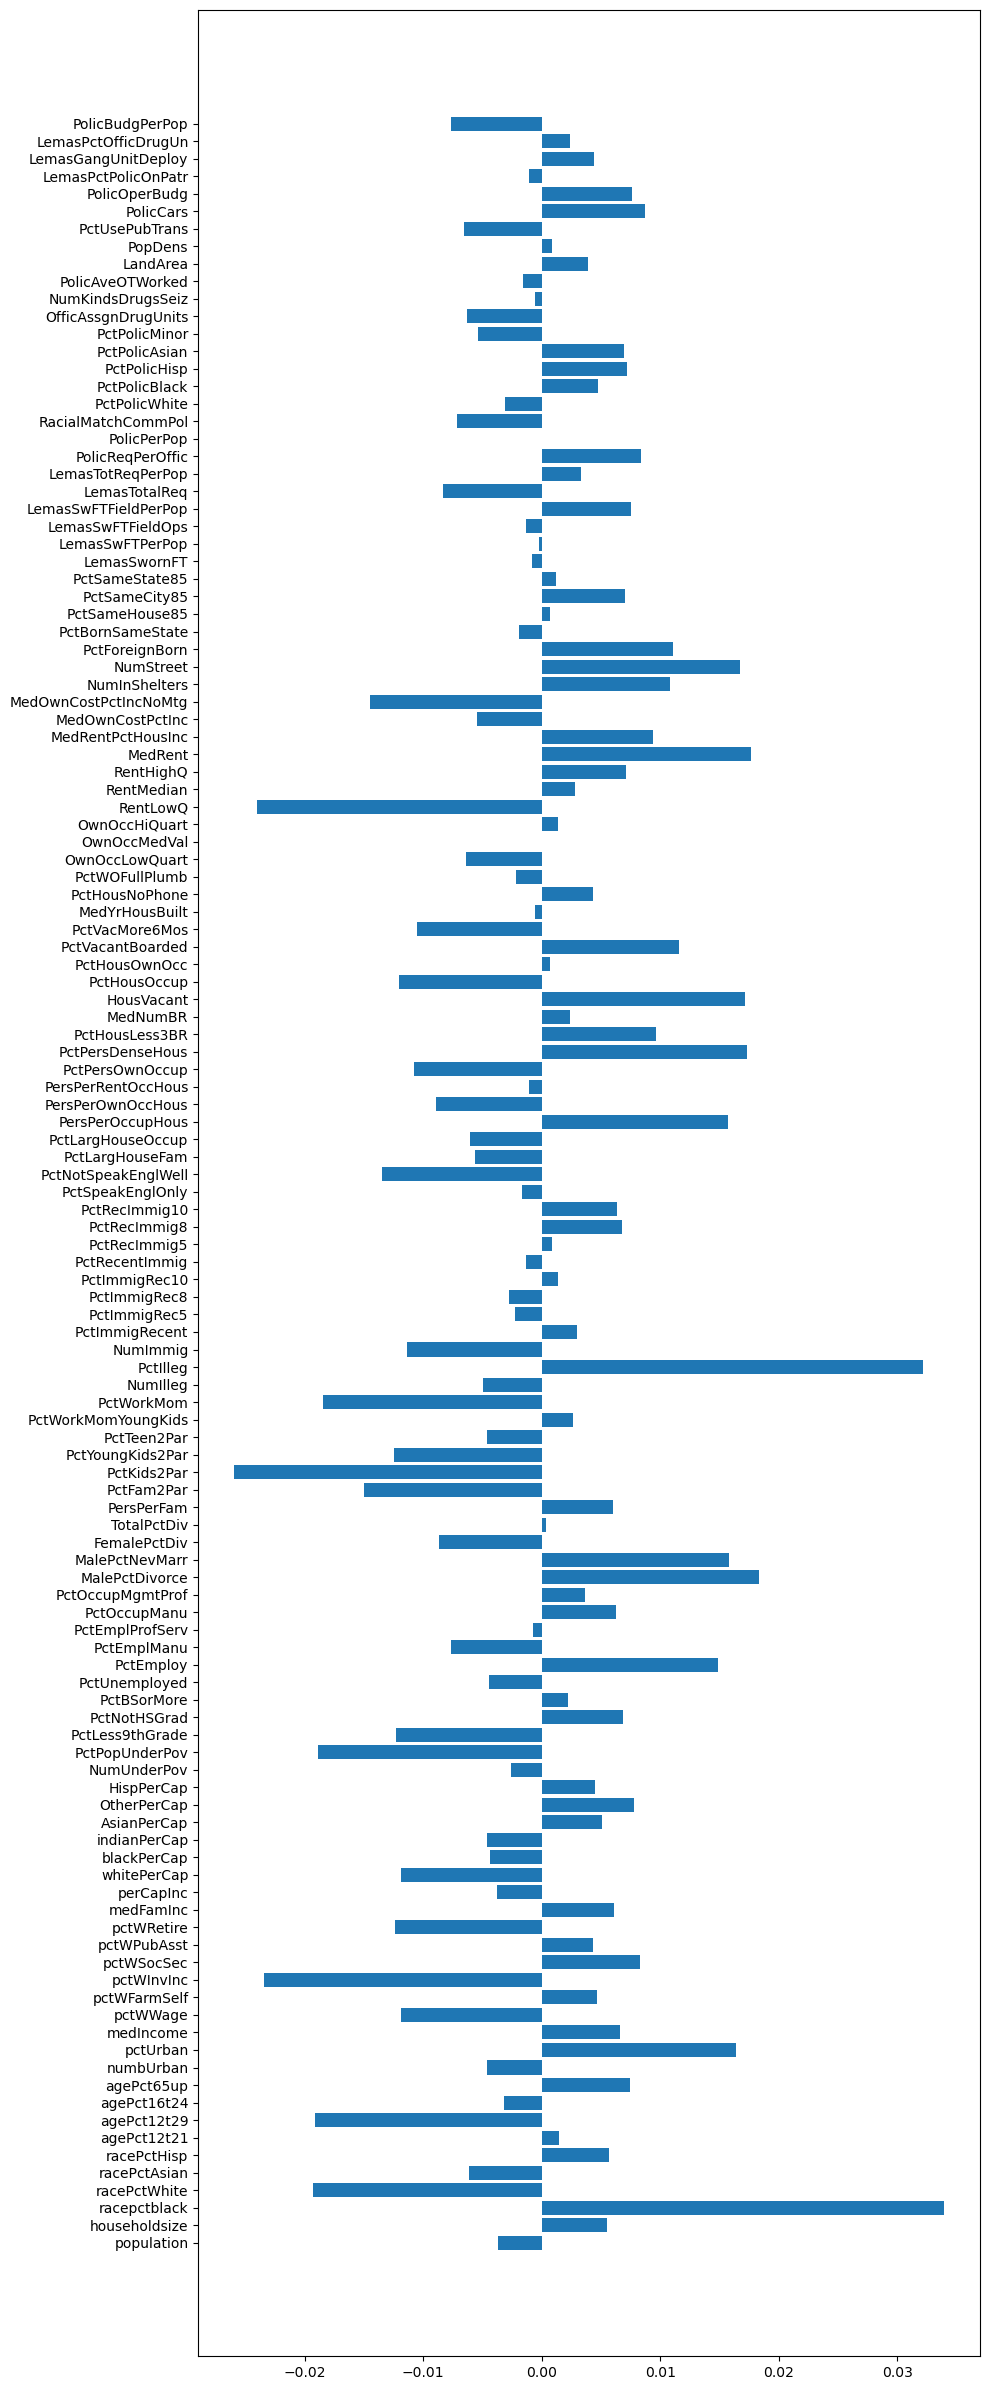

In [37]:
# Now repeat something similar for Ridge
# NOTE: This time we'll use the cross-validate function, which essentially performs nested cross validation 
# - performing multiple train/test splits
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate

grid = {
    'estimator__alpha': np.logspace(-3, 2, 100)
}

pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('standardise', StandardScaler()),
    ('estimator', Ridge())
])

grid_search_cv = GridSearchCV(estimator=pipe, param_grid=grid, cv=3)
cv_result = cross_validate(grid_search_cv, X=X_ml, y=y_ml, cv=3, return_train_score=True)
test_score = cv_result['test_score']
train_score = cv_result['train_score']
plt.bar(x=range(2), height = [np.mean(train_score), np.mean(test_score)], tick_label=['Train', 'Test'], 
        yerr=[np.std(train_score), np.std(test_score)])
plt.title('Ridge CV')
plt.show()

grid_search_cv.fit(X=X_ml, y=y_ml)

fig, ax = plt.subplots()
fig.set_size_inches(10, 24)
plt.barh(y=range(len(X_ml.columns)), 
         width=grid_search_cv.best_estimator_.named_steps.estimator.coef_)
ax.set_yticks(ticks=range(len(X_ml.columns)),
               labels=grid_search_cv.best_estimator_.named_steps.imputer.feature_names_in_)
plt.tight_layout()
plt.show()

In [38]:
coef_df = pd.concat([coef_df,
                     pd.DataFrame(data=[grid_search_cv.best_estimator_.named_steps.estimator.coef_],
                                  columns=grid_search_cv.best_estimator_.named_steps.imputer.feature_names_in_,
                                  index=['Ridge',])])

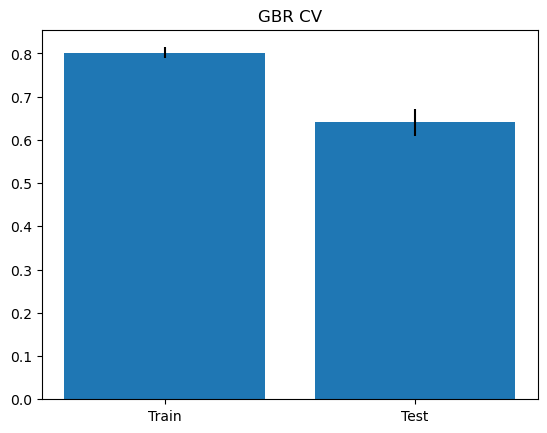

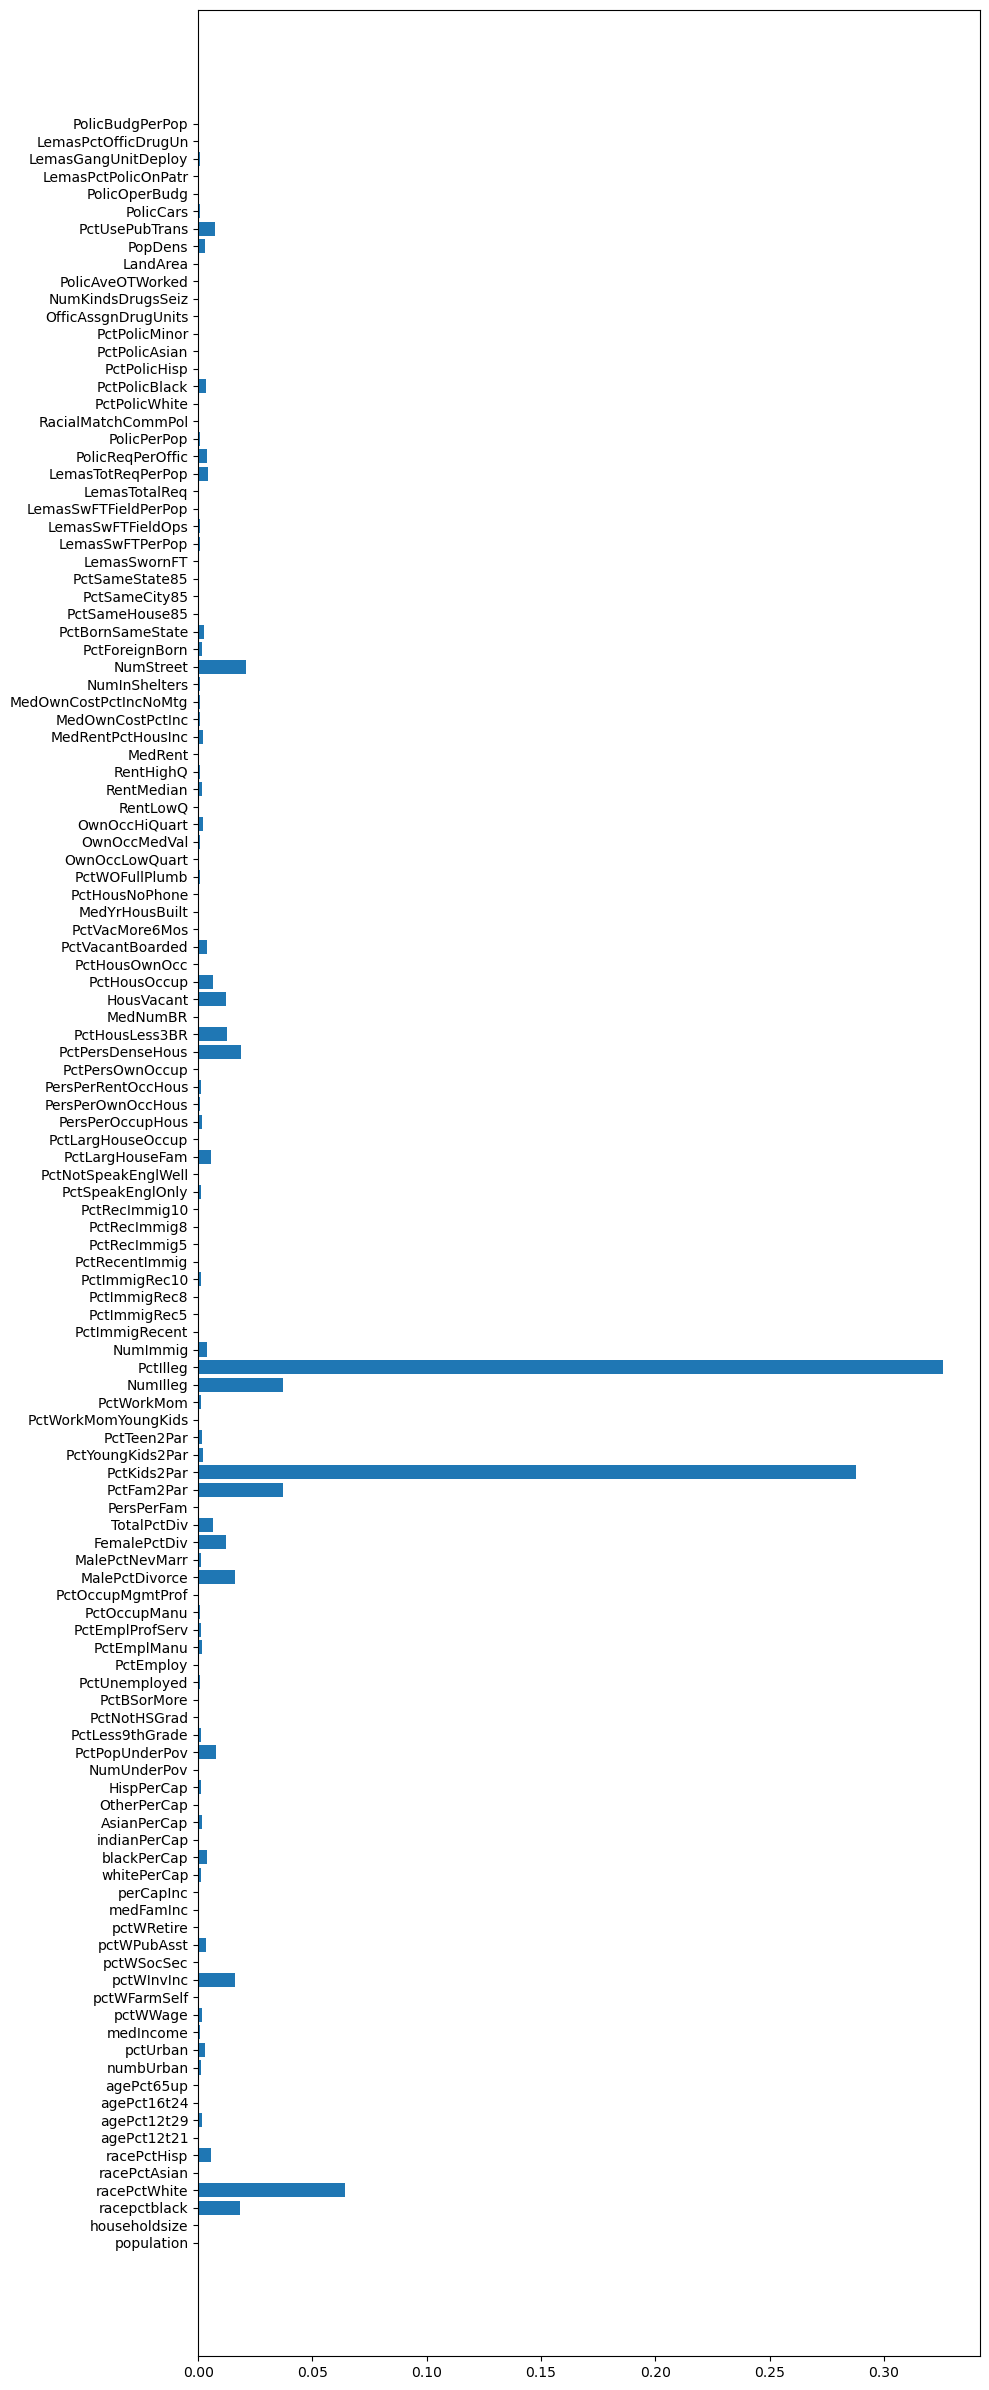

In [44]:
# And now GBR
from sklearn.ensemble import GradientBoostingRegressor

grid = {
    # 'estimator__learning_rate': np.logspace(-2, 1, 3),
    'estimator__learning_rate': np.logspace(-2, -0.5, 3),
    'estimator__min_samples_split': np.logspace(-2, 0, 3),
    'estimator__max_depth': np.arange(1, 5, 2)
}

pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('standardise', StandardScaler()),
    ('estimator', GradientBoostingRegressor(random_state=42))
])

grid_search_cv = GridSearchCV(estimator=pipe, param_grid=grid, cv=3)
cv_result = cross_validate(estimator=grid_search_cv, X=X_ml, y=y_ml, cv=3, return_train_score=True)
test_score = cv_result['test_score']
train_score = cv_result['train_score']
plt.bar(x=range(2), 
        height = [np.mean(train_score), np.mean(test_score)], 
        tick_label=['Train', 'Test'], 
        yerr=[np.std(train_score), np.std(test_score)])
plt.title('GBR CV')
plt.show()

grid_search_cv.fit(X=X_ml, y=y_ml)

fig, ax = plt.subplots()
fig.set_size_inches(10,24)
plt.barh(y=range(len(X_ml.columns)), 
         width=np.abs(grid_search_cv.best_estimator_.named_steps.estimator.feature_importances_))
ax.set_yticks(ticks=range(len(X_ml.columns)),
              labels=grid_search_cv.best_estimator_.named_steps.imputer.feature_names_in_)
plt.tight_layout()
plt.show()

In [ ]:
coef_df = pd.concat([coef_df,
                     pd.DataFrame(data=[grid_search_cv.best_estimator_.named_steps.estimator.feature_importances_],
                                  columns=grid_search_cv.best_estimator_.named_steps.imputer.feature_names_in_,
                                  index=['GBR',])])

In [ ]:
coef_df

In [ ]:
# Compare the coefficients produced by OLS vs Lasso vs Ridge vs GBR
# NOTE: GBR doesn't produce coefficients, but does have the concept of feature importance
# we'll need to take the absolute coefficient value to compare though
non_zero_coef = (coef_df != 0).any()
all_coef_compare_df = coef_df[non_zero_coef[non_zero_coef].index.to_list()].copy()

ind = np.arange(len(all_coef_compare_df.columns))
width = 0.2

fig, ax = plt.subplots()
fig.set_size_inches(10, 24)
ax.barh(ind, np.abs(all_coef_compare_df.loc['OLS']), width, label='OLS')
ax.barh(ind + width, np.abs(all_coef_compare_df.loc['Lasso']), width, label='Lasso')
ax.barh(ind + (2 * width), np.abs(all_coef_compare_df.loc['Ridge']), width, label='Ridge')
ax.barh(ind + (3 * width), np.abs(all_coef_compare_df.loc['GBR']), width, label='GBR')

ax.invert_yaxis()
ax.set_yticks(ticks=ind + (2 * width), labels=all_coef_compare_df.columns)
ax.legend()
plt.tight_layout()
plt.show()